## PROBLEM PLECAKOWY

In [2]:
import pygad
import numpy 
import time

## Zadanie z wykładu (problem podziału)

Parameters of the best solution : [0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0.]
Fitness value of the best solution = -0.0
Predicted output based on the best solution : 252.0


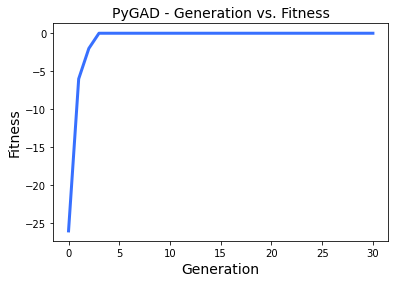

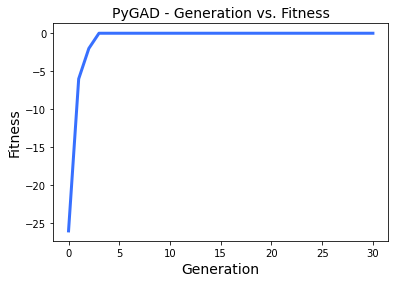

In [6]:
S = [1, 2, 3, 6, 10, 17, 25, 29, 30, 41, 51, 60, 70, 79, 80]

#definiujemy parametry chromosomu
#geny to liczby: 0 lub 1
gene_space = [0, 1]

#definiujemy funkcję fitness
def fitness_func(solution, solution_idx):
    sum1 = numpy.sum(solution * S)
    solution_invert = 1 - solution
    sum2 = numpy.sum(solution_invert * S)
    fitness = -numpy.abs(sum1-sum2)
    #lub: fitness = 1.0 / (1.0 + numpy.abs(sum1-sum2))
    return fitness

fitness_function = fitness_func

#ile chromsomów w populacji
#ile genow ma chromosom
sol_per_pop = 10
num_genes = len(S)

#ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
#ile pokolen
#ilu rodzicow zachowac (kilka procent)
num_parents_mating = 5
num_generations = 30
keep_parents = 2

#jaki typ selekcji rodzicow?
#sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "sss"

#w il =u punktach robic krzyzowanie?
crossover_type = "single_point"

#mutacja ma dzialac na ilu procent genow?
#trzeba pamietac ile genow ma chromosom
mutation_type = "random"
mutation_percent_genes = 8

#inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

#uruchomienie algorytmu
ga_instance.run()

#podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

#tutaj dodatkowo wyswietlamy sume wskazana przez jedynki
prediction = numpy.sum(S*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()


## Problem plecakowy (przypomnienie z wykładu)

W problemie plecakowym dana jest lista przedmiotów o wartościach i wagach. Chcemy do
plecaka zabrać najcenniejsze rzeczy. Pytanie brzmi: jaki zestaw przedmiotów (o łącznej
maksymalnej wadze n kg) ma największą wartość?


## Zadanie 1

Rozwiąż powyższy problem plecakowy w Pythonie z użyciem paczki pygad. Możesz skorzystać
z kodu z partition_ga.py, który trzeba rozsądnie zmodyfikować. Najważniejsze jest poprawne
napisanie funkcji fitness – wskazówki były na wykładzie.


## Inincjacja

In [3]:
#[wartosc,waga]
items = [
    ['zegar',100,7],
    ['obraz-pejzaż',300,7],
    ['obraz-portret',200,6],
    ['radio',40,2],
    ['laptop',500,5],
    ['lampka_nocna',70,6],
    ['srebrne_sztućce',100,1],
    ['porcelana',250,3],
    ['figura_z_brązu',300,10],
    ['skórzana_torebka',280,3],
    ['odkurzacz',300,15]]

max_weight = 25

#definiujemy parametry chromosomu
#geny to liczby: 0 lub 1 (nie bierzemy przedmiotu lub bierzemy)
gene_space = [0, 1]

#ile chromsomów w populacji
#ile genow ma chromosom
sol_per_pop = 10
num_genes = 11

#ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
#ile pokolen
#ilu rodzicow zachowac co pokolenie(kilka procent)
num_parents_mating = 5
num_generations = 50
keep_parents = 2

#jaki typ selekcji rodzicow?
#sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "sss"

#w il =u punktach robic krzyzowanie?
crossover_type = "single_point"

#mutacja ma dzialac na ilu procent genow?
#trzeba pamietac ile genow ma chromosom
#1/ dlugosc chromosomu -> 1/11 = 9.09% 
mutation_type = "random"
mutation_percent_genes = 10

## a) i c)

a) Program tworzył nowe pokolenia dopóki nie znajdzie rozwiązania z fitness równym 
1600. Gdy fitness 1600 zostanie osiągnięte, to algorytm przerwie działanie.

c) Zmierz, ile czasu działał algorytm genetyczny. 

0.01807546615600586
Parametery najlepszego rozwiązania : [0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.]
Fitness najlepszego rozwiązania = 1630
Ile pokoleń minęło, aż do znalezienia najlepszego rozwiązania: 10


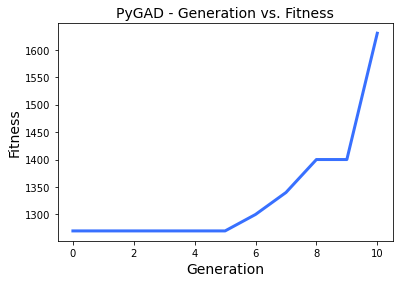

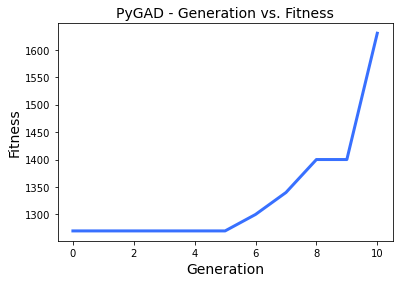

In [4]:
#definiujemy funkcję fitness
def fitness_func(solution, solution_idx):
    total_weight = 0
    total_value = 0
    for i in range(len(solution)):
        if solution[i] == 1:#czyli bierzemy przedmiot
            total_weight += items[i][2]
            total_value += items[i][1]
    if total_weight > max_weight:
        return 0
    else:
        return total_value

fitness_function = fitness_func

start = time.time()
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       stop_criteria="reach_1600",
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

#uruchomienie algorytmu
ga_instance.run()
end = time.time()
print(end - start)


#podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parametery najlepszego rozwiązania : {solution}".format(solution=solution))
print("Fitness najlepszego rozwiązania = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Ile pokoleń minęło, aż do znalezienia najlepszego rozwiązania: {generations_completed}".format(generations_completed=ga_instance.generations_completed))
#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()

#na osi X sa kolejne pokolenia, a na osi Y fitness najlepszego rozwiazania w danym pokoleniu

## d)

d) Zmierz czas 10 razy, zapisz wszystkie wyniki i podaj średnią z wyników. Ile średnio 
czasu zajmuje algorytmowi genetycznemu znalezienie rozwiązania

In [4]:
czasy = []
for i in range(10):
    start = time.time()
    #inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
    ga_instance = pygad.GA(gene_space=gene_space,
                           num_generations=num_generations,
                           num_parents_mating=num_parents_mating,
                           fitness_func=fitness_function,
                           stop_criteria="reach_1600",
                           sol_per_pop=sol_per_pop,
                           num_genes=num_genes,
                           parent_selection_type=parent_selection_type,
                           keep_parents=keep_parents,
                           crossover_type=crossover_type,
                           mutation_type=mutation_type,
                           mutation_percent_genes=mutation_percent_genes)

    #uruchomienie algorytmu
    ga_instance.run()
    end = time.time()
    czas = end - start
    czasy.append(czas)
    
print("Średnia z czasów: {}".format(numpy.mean(czasy)))

Średnia z czasów: 0.007154726982116699
